# Masterclass Qiskit — 00 • Introduction à l'information quantique & Qiskit

Objectifs pédagogiques (≈30–40 min) :
- Installer et configurer Qiskit (local) et comprendre la logique des modules.
- Manipuler les objets clés : `QuantumCircuit`, `QuantumRegister`, `ClassicalRegister`.
- Simuler un circuit (statevector & qasm) et mesurer.
- Lire un diagramme de circuit et interpréter les résultats.

Prérequis : Python de base (variables, fonctions), un peu de linéaire (vecteurs).

## 1. Mise en place

> Si Qiskit n'est pas installé sur votre machine :  
> `pip install qiskit qiskit-aer qiskit-ibm-runtime matplotlib numpy`

In [2]:
# Vérifier la version de Qiskit installée
import sys, platform
print("Python:", sys.version.split()[0], "| OS:", platform.platform())

import qiskit
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer

Python: 3.11.7 | OS: Windows-10-10.0.26100-SP0


## 2. Premier circuit : un seul qubit, aucune porte
- On crée un circuit avec 1 qubit + 1 bit classique, on mesure.
- Attendu : toujours `0`.

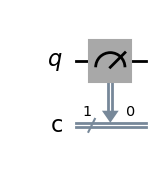

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1, 1)
qc.measure(0, 0)  # mesure Z
qc.draw('mpl')

In [4]:
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
result = backend.run(compiled, shots=1024).result()
counts = result.get_counts()
counts

{'0': 1024}

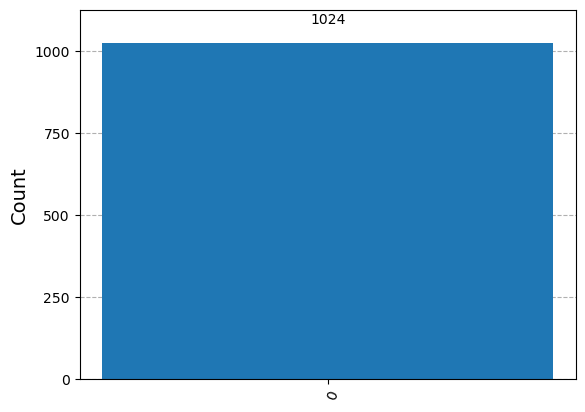

In [5]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Pause pédagogique
- Pourquoi obtenons-nous toujours `0` ?
- Qubit initialisé en |0⟩, mesure en base Z → résultat déterministe.

## 3. Ajouter une porte Hadamard `H` : naissance de la superposition

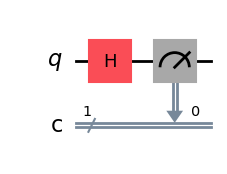

In [6]:
qc2 = QuantumCircuit(1, 1)
qc2.h(0)
qc2.measure(0, 0)
qc2.draw('mpl')

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(transpile(qc2, backend), shots=4096).result()
counts2 = result.get_counts()
counts2

{'0': 2086, '1': 2010}

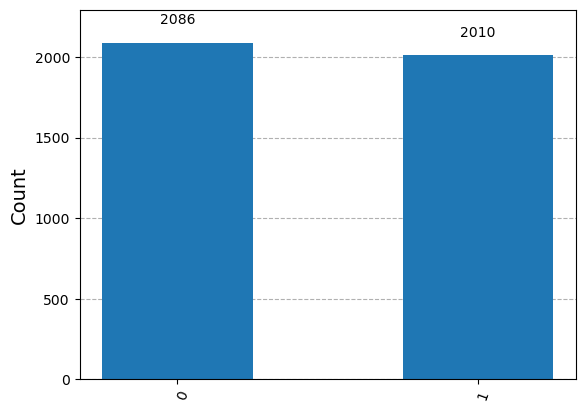

In [8]:
plot_histogram(counts2)

### 4. Observer l'état avec le simulateur `Statevector`

In [9]:
sv = Statevector.from_instruction(QuantumCircuit(1).h(0))
sv.data  # amplitudes de |0> et |1>

AttributeError: 'InstructionSet' object has no attribute 'num_qubits'

**Checkpoint**  
- Vous savez créer un circuit, le simuler, mesurer, visualiser les résultats.

## 5. Exercices guidés (avec solutions plus bas)

1. **X sur |0⟩** : créez un circuit 1-qubit qui applique `X` et mesure. Attendu : ≈100% `1`.
2. **H suivi de X** : `H` puis `X`, prédisez la distribution avant d'exécuter.
3. **Personnaliser les `shots`** : testez 50, 500, 5000. Effet sur les fluctuations statistiques ?

In [ ]:
# Zone de réponse Exo 1
qc_ex1 = QuantumCircuit(1,1)
# TODO: votre code ici (p.ex., qc_ex1.x(0))
qc_ex1.measure(0,0)
backend = Aer.get_backend('qasm_simulator')
counts_ex1 = backend.run(transpile(qc_ex1, backend), shots=1024).result().get_counts()
counts_ex1

## 6. Solutions (déployez uniquement en fin de séance)

In [ ]:
# SOLUTION Exo 1
qc_ex1_sol = QuantumCircuit(1,1)
qc_ex1_sol.x(0)
qc_ex1_sol.measure(0,0)
backend = Aer.get_backend('qasm_simulator')
plot_histogram(backend.run(transpile(qc_ex1_sol, backend), shots=1024).result().get_counts())